In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.manifold import TSNE

In [2]:
train = np.load('train.npz')
img_feature = train['img_feature']
text_feature= train['text_feature']
label= train['label']


dev = np.load('dev.npz')
img_feature_dev = dev['img_feature']
text_feature_dev = dev['text_feature']
label_dev= dev['label']

# TSNE of image features

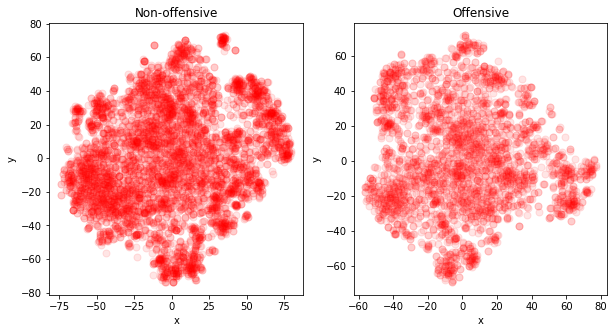

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Non-offensive')
X = img_feature[label==0, :]
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha = 0.1, c = 'r', s = 50, edgecolors=None)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.title('Offensive')
X = img_feature[label==1, :]
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha = 0.1, c = 'r', s = 50, edgecolors=None)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# TSNE of text features

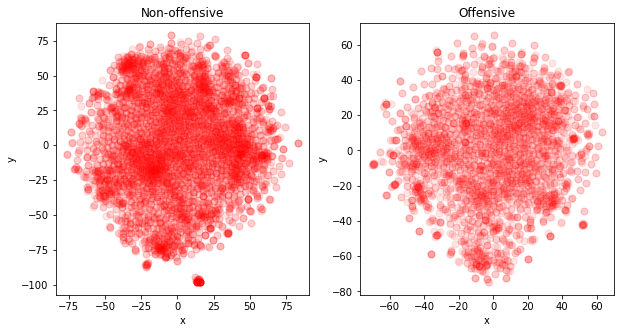

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Non-offensive')
X = text_feature[label==0, :]
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha = 0.1, c = 'r', s = 50, edgecolors=None)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.title('Offensive')
X = text_feature[label==1, :]
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha = 0.1, c = 'r', s = 50, edgecolors=None)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Baseline: Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


X = img_feature[:, :]
y = label[:]
clf = LogisticRegression(random_state=0).fit(X, y)
prob = clf.predict_proba(X)
print('Training AUC ROC with image:', roc_auc_score(y, prob[:,1]))

X = img_feature_dev[:, :]
y = label_dev[:]
prob = clf.predict_proba(X)
print('Validation AUC ROC with image:', roc_auc_score(y, prob[:,1]))

print('******************')

X = text_feature[:, :]
y = label[:]
clf = LogisticRegression(random_state=0).fit(X, y)
prob = clf.predict_proba(X)
print('Training AUC ROC with text:', roc_auc_score(y, prob[:,1]))

X = text_feature_dev[:, :]
y = label_dev[:]
prob = clf.predict_proba(X)
print('Validation AUC ROC with text:', roc_auc_score(y, prob[:,1]))

print('******************')


X = np.concatenate((img_feature, text_feature), axis=1)
y = label[:]
clf = LogisticRegression(random_state=0).fit(X, y)
prob = clf.predict_proba(X)
print('Training AUC ROC with text+image:', roc_auc_score(y, prob[:,1]))

X = np.concatenate((img_feature_dev, text_feature_dev), axis=1)
y = label_dev[:]
prob = clf.predict_proba(X)
print('Validation AUC ROC with text+image:', roc_auc_score(y, prob[:,1]))
print('******************')

Training AUC ROC with image: 0.6772459617987667
Validation AUC ROC with image: 0.5507679999999999
******************
Training AUC ROC with text: 0.7684000601594225
Validation AUC ROC with text: 0.6111519999999999
******************
Training AUC ROC with text+image: 0.8049364716498721
Validation AUC ROC with text+image: 0.620624
******************
